In [1]:
import sys, os
sys.path.append(os.path.abspath("../"))

In [2]:
from art_enrich import lib as tab

In [24]:
%matplotlib inline
import betterplotlib as bpl
import numpy as np
from scipy import integrate
bpl.presentation_style()

In [3]:
tab.detailed_enrichment_init()

In [34]:
def get_n_sn(age, z):
    return tab.get_ejecta_rate_sn_ii_py(age, z)[9] 

def get_energy(age, z):
    return tab.get_ejecta_rate_sn_ii_py(age, z)[10] 

In [22]:
for z in np.logspace(-7, np.log10(0.02), 20):
    print(get_n_sn(4.5E6, z))

6.936376292999999e-10
6.935751203895675e-10
6.934562856256632e-10
6.932303706158746e-10
6.928008869364285e-10
6.919844018738238e-10
6.904321942129498e-10
6.87481315216107e-10
6.818714428559199e-10
6.712065975907423e-10
6.509318181969401e-10
6.123877353484486e-10
5.39112150259443e-10
3.9980902061327384e-10
1.3498190383697816e-10
0.0
0.0
5.699319824174344e-11
2.4227586539595606e-10
5.94514e-10


/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


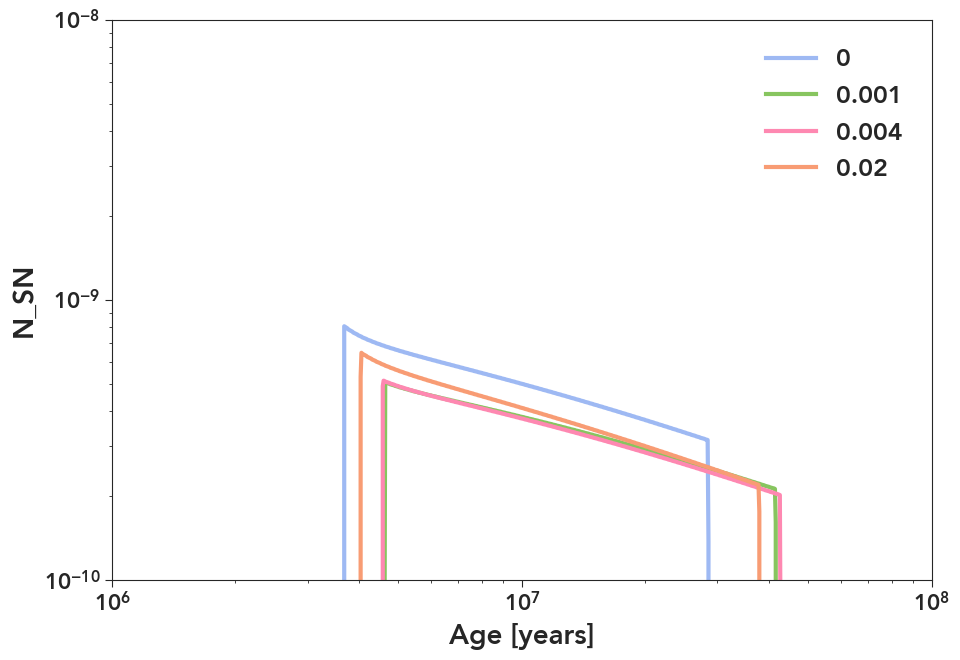

In [29]:
fig, ax = bpl.subplots()
ages = np.logspace(6, 8, 1000)
for z in [0, 0.001, 0.004, 0.02]:
    ax.plot(ages, [get_n_sn(a, z) for a in ages], label=z)
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.add_labels("Age [years]", "N_SN")
ax.set_limits(1E6, 1E8, 1E-10, 1E-8)

Integrate to get total number of SN

In [32]:
integrate.cumtrapz(x=ages, y=[get_n_sn(a, z) for a in ages])[-1]

0.010984603928256384

/Users/gillenb/miniconda3/envs/general/lib/python3.5/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


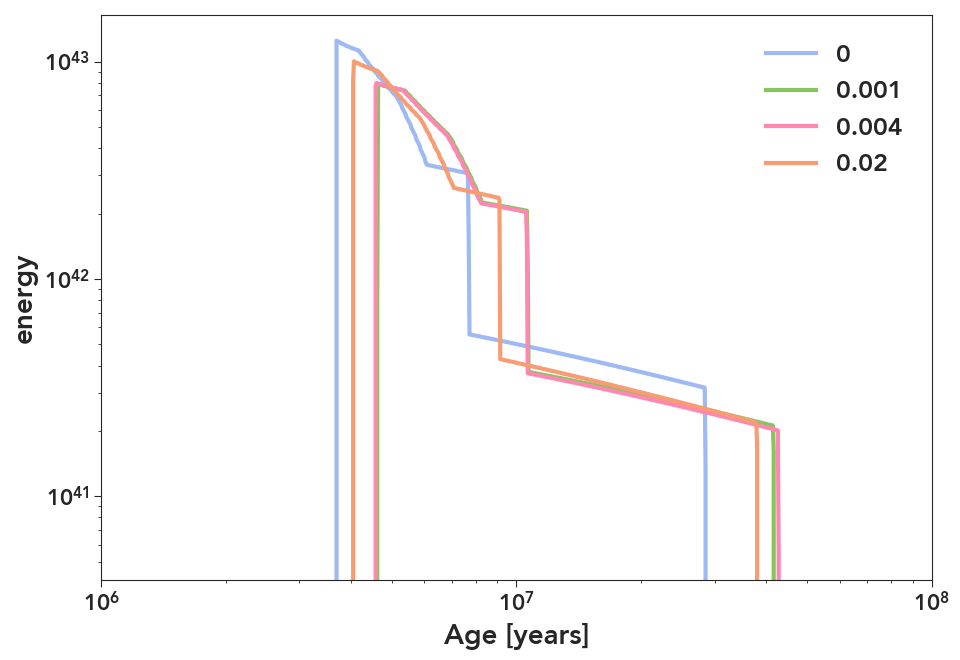

In [36]:
fig, ax = bpl.subplots()
ages = np.logspace(6, 8, 1000)
for z in [0, 0.001, 0.004, 0.02]:
    ax.plot(ages, [get_energy(a, z) for a in ages], label=z)
ax.legend()
ax.set_yscale("log")
ax.set_xscale("log")
ax.add_labels("Age [years]", "energy")
ax.set_limits(1E6, 1E8)